In [13]:
import json
import ast

In [15]:
import random
def sample_json_file(input_file_path, output_file_path, sample_size):
    """
    Reads a large newline-delimited JSON file and writes a smaller sampled JSON file.
    
    Parameters:
        input_file_path (str): Path to the input JSON file.
        output_file_path (str): Path to the output JSON file.
        sample_size (int): Number of records to sample.
        
    Returns:
        None
    """
    
    # Count total number of records in the input file
    total_records = 0
    with open(input_file_path, 'r') as infile:
        for line in infile:
            total_records += 1
    
    # Generate random line numbers to sample
    sample_line_nums = random.sample(range(total_records), sample_size)
    sample_line_nums.sort()
    
    # Read input file and write sampled records to output file
    with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
        current_line_num = 0
        sampled_count = 0
        for line in infile:
            if current_line_num == sample_line_nums[sampled_count]:
                outfile.write(line)
                sampled_count += 1
                if sampled_count >= sample_size:
                    break
            current_line_num += 1

import ast  # For safely evaluating a string containing a Python literal or container display

def sample_python_dict_file(input_file_path, output_file_path, sample_size):
    """
    Reads a large file with Python-style dictionaries and writes a smaller sampled JSON file.
    
    Parameters:
        input_file_path (str): Path to the input file.
        output_file_path (str): Path to the output JSON file.
        sample_size (int): Number of records to sample.
        
    Returns:
        None
    """
    
    # Count total number of records in the input file
    total_records = 0
    with open(input_file_path, 'r') as infile:
        for line in infile:
            total_records += 1
    
    # Generate random line numbers to sample
    sample_line_nums = random.sample(range(total_records), sample_size)
    sample_line_nums.sort()
    
    # Read input file and write sampled records to output file
    with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
        current_line_num = 0
        sampled_count = 0
        for line in infile:
            if current_line_num == sample_line_nums[sampled_count]:
                # Safely evaluate the Python dictionary string to a dictionary
                py_dict = ast.literal_eval(line.strip())
                # Convert the Python dictionary to a JSON object
                json_str = json.dumps(py_dict)
                outfile.write(json_str + "\n")
                sampled_count += 1
                if sampled_count >= sample_size:
                    break
            current_line_num += 1

def convert_to_well_formed_json(input_file_path, output_file_path):
    """
    Reads a file with Python-style dictionaries and writes a well-formed JSON file.
    
    Parameters:
        input_file_path (str): Path to the input file containing Python-style dictionaries.
        output_file_path (str): Path to the output JSON file.
        
    Returns:
        None
    """
    
    with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
        for line in infile:
            # Safely evaluate the Python dictionary string to a dictionary
            py_dict = ast.literal_eval(line.strip())
            # Convert the Python dictionary to a JSON object
            json_str = json.dumps(py_dict)
            outfile.write(json_str + "\n")


In [11]:
input_file_path = '/Volumes/DeepLearner/Search & Recommendation System/Data/australian_users_items.json'
output_file_path = '/Volumes/DeepLearner/Search & Recommendation System/Data/steam_reviews_sample_1k.json'

sample_size = 1000

sample_python_dict_file(input_file_path, output_file_path, sample_size)

In [16]:
input_file_path = '/Volumes/DeepLearner/Search & Recommendation System/Data/australian_users_items.json'
output_file_clean_path = '/Volumes/DeepLearner/Search & Recommendation System/Data/australian_users_items_clean.json'

convert_to_well_formed_json(input_file_path, output_file_clean_path)

In [8]:
def read_first_n_records(file_path, n=5):
    records = []
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if i >= n:
                break
            records.append(json.loads(line.strip()))
    return records

# Function to read the first few raw lines from the file
def read_first_n_raw_lines(file_path, n=5):
    lines = []
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if i >= n:
                break
            lines.append(line.strip())
    return lines


read_first_n_raw_lines(input_file_path, 5)

['{\'user_id\': \'76561197970982479\', \'items_count\': 277, \'steam_id\': \'76561197970982479\', \'user_url\': \'http://steamcommunity.com/profiles/76561197970982479\', \'items\': [{\'item_id\': \'10\', \'item_name\': \'Counter-Strike\', \'playtime_forever\': 6, \'playtime_2weeks\': 0}, {\'item_id\': \'20\', \'item_name\': \'Team Fortress Classic\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'30\', \'item_name\': \'Day of Defeat\', \'playtime_forever\': 7, \'playtime_2weeks\': 0}, {\'item_id\': \'40\', \'item_name\': \'Deathmatch Classic\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'50\', \'item_name\': \'Half-Life: Opposing Force\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'60\', \'item_name\': \'Ricochet\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'70\', \'item_name\': \'Half-Life\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'130\', \'item_name\': \'Half-Life: Blue Shi

In [17]:
read_first_n_records(output_file_clean_path, 5)

[{'user_id': '76561197970982479',
  'items_count': 277,
  'steam_id': '76561197970982479',
  'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
  'items': [{'item_id': '10',
    'item_name': 'Counter-Strike',
    'playtime_forever': 6,
    'playtime_2weeks': 0},
   {'item_id': '20',
    'item_name': 'Team Fortress Classic',
    'playtime_forever': 0,
    'playtime_2weeks': 0},
   {'item_id': '30',
    'item_name': 'Day of Defeat',
    'playtime_forever': 7,
    'playtime_2weeks': 0},
   {'item_id': '40',
    'item_name': 'Deathmatch Classic',
    'playtime_forever': 0,
    'playtime_2weeks': 0},
   {'item_id': '50',
    'item_name': 'Half-Life: Opposing Force',
    'playtime_forever': 0,
    'playtime_2weeks': 0},
   {'item_id': '60',
    'item_name': 'Ricochet',
    'playtime_forever': 0,
    'playtime_2weeks': 0},
   {'item_id': '70',
    'item_name': 'Half-Life',
    'playtime_forever': 0,
    'playtime_2weeks': 0},
   {'item_id': '130',
    'item_name': 'Half-Life:

In [23]:
output_review_clean_path = '/Volumes/DeepLearner/Search & Recommendation System/Data/steam_reviews_clean.json'


In [24]:
reviews_data_path = '/Volumes/DeepLearner/Search & Recommendation System/Data/australian_user_reviews.json'
convert_to_well_formed_json(reviews_data_path, output_review_clean_path)
#read_first_n_records(reviews_data_path, 5)

In [25]:
read_first_n_records(output_review_clean_path, 5)

[{'user_id': '76561197970982479',
  'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
  'reviews': [{'funny': '',
    'posted': 'Posted November 5, 2011.',
    'last_edited': '',
    'item_id': '1250',
    'helpful': 'No ratings yet',
    'recommend': True,
    'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
   {'funny': '',
    'posted': 'Posted July 15, 2011.',
    'last_edited': '',
    'item_id': '22200',
    'helpful': 'No ratings yet',
    'recommend': True,
    'review': "It's unique and worth a playthrough."},
   {'funny': '',
    'posted': 'Posted April 21, 2011.',
    'last_edited': '',
    'item_id': '43110',
    'helpful': 'No ratings yet',
    'recommend': True,
    'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at t

## EDA

In [27]:
import pandas as pd

# Function to load the entire JSON file into a Pandas DataFrame
def load_json_to_df(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return pd.json_normalize(data, 'items', ['user_id', 'items_count', 'steam_id', 'user_url'])

# Function to load the review JSON file into a Pandas DataFrame
def load_review_json_to_df(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return pd.json_normalize(data, 'reviews', ['user_id'])


# Load the cleaned sample data into a DataFrame
df = load_json_to_df(output_file_path)

# Display the first few rows of the DataFrame
df.head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,steam_id,user_url
0,300,Day of Defeat: Source,425,0,Moomfina,50,76561198056795460,http://steamcommunity.com/id/Moomfina
1,240,Counter-Strike: Source,1768,0,Moomfina,50,76561198056795460,http://steamcommunity.com/id/Moomfina
2,320,Half-Life 2: Deathmatch,0,0,Moomfina,50,76561198056795460,http://steamcommunity.com/id/Moomfina
3,340,Half-Life 2: Lost Coast,0,0,Moomfina,50,76561198056795460,http://steamcommunity.com/id/Moomfina
4,360,Half-Life Deathmatch: Source,0,0,Moomfina,50,76561198056795460,http://steamcommunity.com/id/Moomfina


In [28]:
# Calculate basic statistics
unique_users = df['user_id'].nunique()
unique_items = df['item_id'].nunique()
total_records = len(df)

unique_users, unique_items, total_records

(810, 4981, 57767)

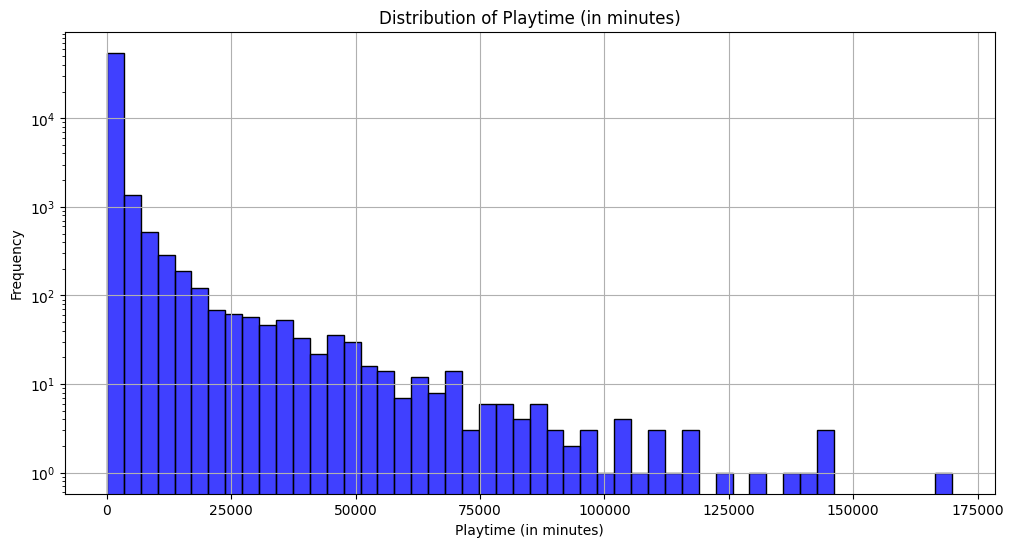

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the distribution of playtime_forever
sns.histplot(df['playtime_forever'], bins=50, kde=False, color='b')
plt.title('Distribution of Playtime (in minutes)')
plt.xlabel('Playtime (in minutes)')
plt.ylabel('Frequency')
plt.yscale('log')  # Using a log scale due to the skewness of the data
plt.grid(True)

plt.show()

# EDA of Reviews

In [30]:
cleaned_review_df = load_review_json_to_df(output_review_clean_path)

cleaned_review_df.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637


In [31]:
# Calculate basic statistics for the review dataset
unique_users_reviews = cleaned_review_df['user_id'].nunique()
unique_items_reviews = cleaned_review_df['item_id'].nunique()
total_records_reviews = len(cleaned_review_df)

# Check for missing values in crucial columns
missing_values_reviews = cleaned_review_df[['user_id', 'item_id', 'recommend']].isnull().sum()

unique_users_reviews, unique_items_reviews, total_records_reviews, missing_values_reviews


(25458,
 3682,
 59305,
 user_id      0
 item_id      0
 recommend    0
 dtype: int64)

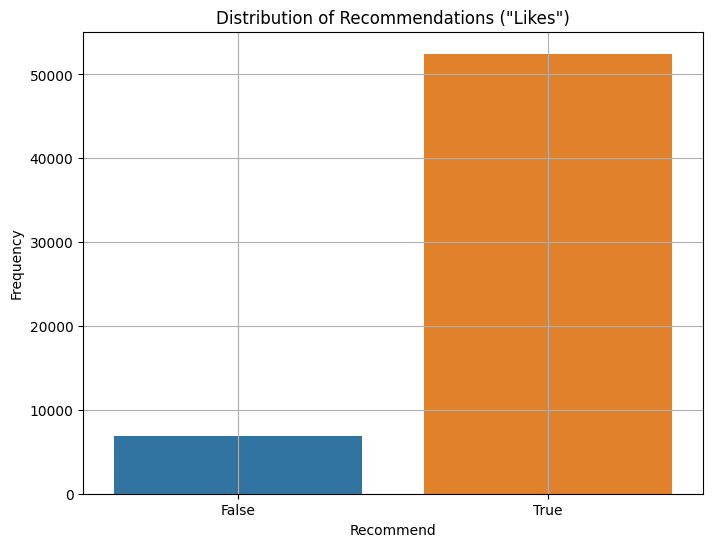

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the distribution of recommendations ("likes")
sns.countplot(data=cleaned_review_df, x='recommend')
plt.title('Distribution of Recommendations ("Likes")')
plt.xlabel('Recommend')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()
